<a href="https://colab.research.google.com/github/tilakparth/Data_Science/blob/master/neural%20network/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
img_ = cv2.imread("../me.jpg")
img_ = cv2.cvtColor(img_,2)
img_ = cv2.resize(img_,(400,400))
img_gray = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)

In [ ]:
def drawing(img,title ="title"):
    plt.style.use("seaborn")
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.title(title+str(img.shape))
    plt.show()

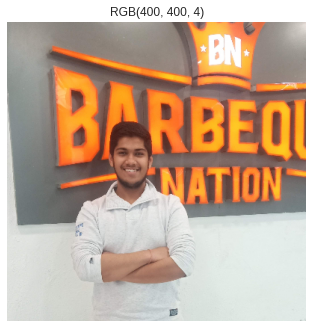

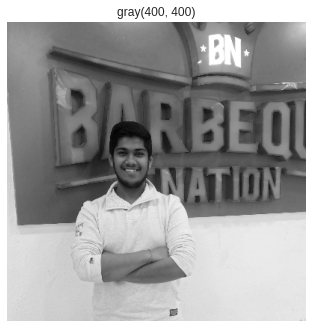

In [ ]:
drawing(img_,"RGB")
drawing(img_gray,"gray")

In [ ]:
## Hardcoded filter

def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    F = img_filter.shape[0] #3
    new_img = np.zeros((W-F+1,H-F+1))
    for row in range(W-F+1):
        for col in range(H-F+1):      ## First two loop iterating on image
            for i in range(F):
                for j in range(F):    ## Last two loop for iterating over filter
                    new_img[row][col] += (img[row+i][col+j]*img_filter[i][j])
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                if new_img[row][col]<0:
                    new_img[row][col] = 0
    return new_img ##Activation map

In [ ]:
blur_filter = np.ones((3,3))/9.0

In [ ]:
print(blur_filter)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [ ]:
output = convolution(img_gray,blur_filter)

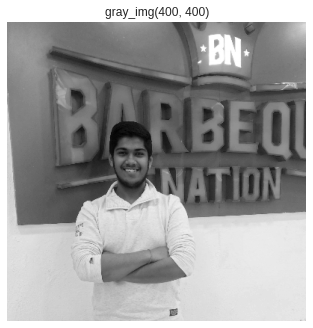

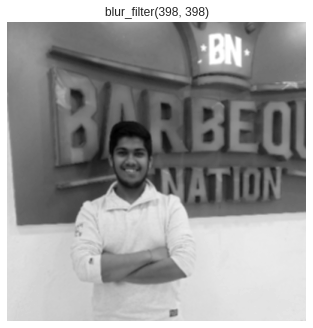

In [ ]:
drawing(img_gray,"gray_img")
drawing(output,"blur_filter")

In [ ]:
edge_filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
output1 = convolution(img_gray,edge_filter)

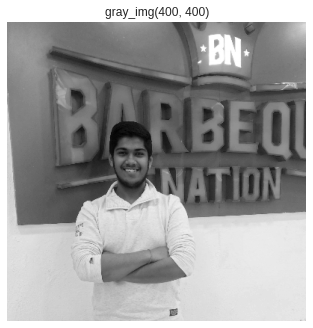

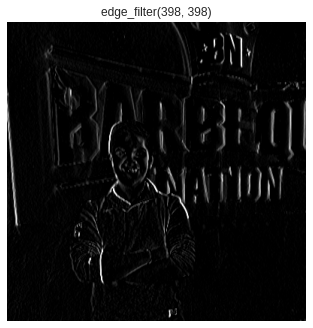

In [ ]:
drawing(img_gray,"gray_img")
drawing(output1,"edge_filter")

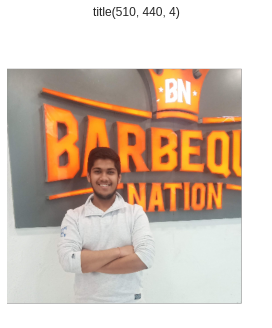

In [ ]:
# padding 
pad_img = np.pad(img_,((80,30),(0,40),(0,0)),"constant",constant_values =0)
drawing(pad_img)

#### Implement Pooling Operation

In [ ]:
X = np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])

In [ ]:
def pooling(X,mode = "max"):
    stride = 2
    f = 2
    H,W = X.shape
    HO = int((H-f)/stride)+1
    WO = int((W-f)/stride)+1
    output = np.zeros((HO,WO))
#     print(output.shape)
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start : r_end,c_start:c_end]
#             print(X_slice)
#             print(np.max(X_slice))
            if mode == "max":
                output[r][c] = np.max(X_slice)
            else :
                output[r][c] = np.mean(X_slice)
    return output 

In [ ]:
##Max pooling
pooling(X,"max")

array([[6., 8.],
       [3., 4.]])

In [ ]:
##Avg ppoling
pooling(X,"avg")

array([[2.75, 4.75],
       [1.75, 1.75]])

# CNN Fashion Training 

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

### Data Prepration 

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
((X_train,Y_train),(X_test,Y_test)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# X_train = X_train[:10000]
# Y_train = Y_train[:10000]

In [ ]:
X_train = X_train/255.0

In [ ]:
X_train = X_train.reshape((-1,28,28,1))

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
np.unique(Y_train,return_counts=True)  ##Well balanced data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
Y_train = np_utils.to_categorical(Y_train)

In [ ]:
Y_train.shape  ## Converted to one_hot matrix

(60000, 10)

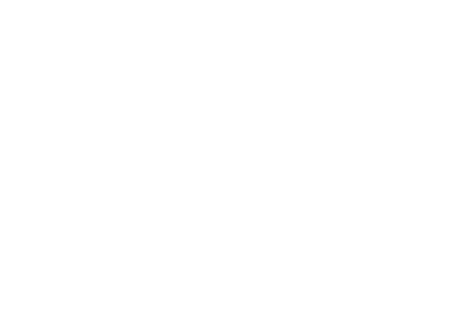

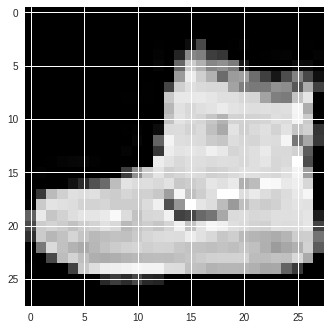

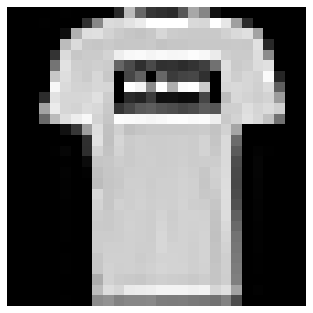

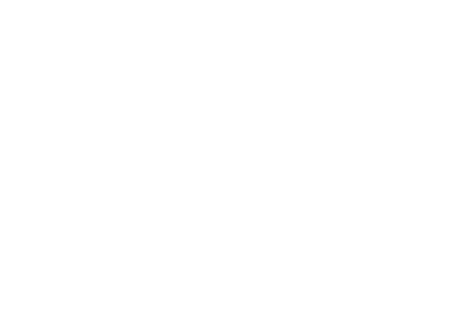

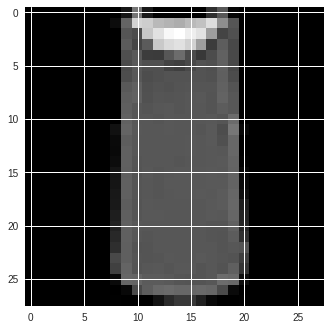

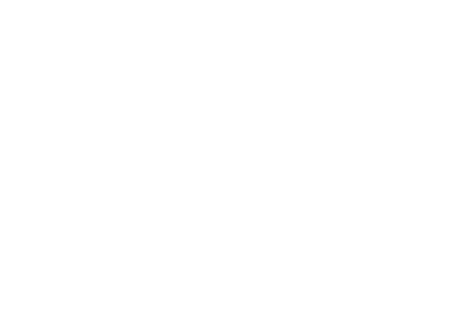

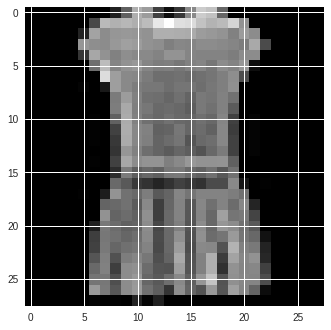

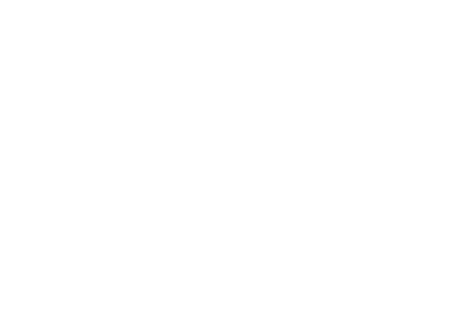

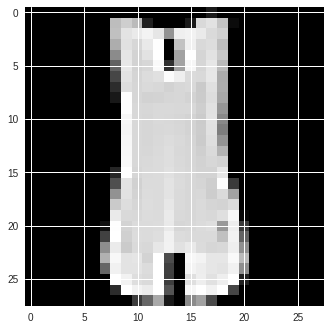

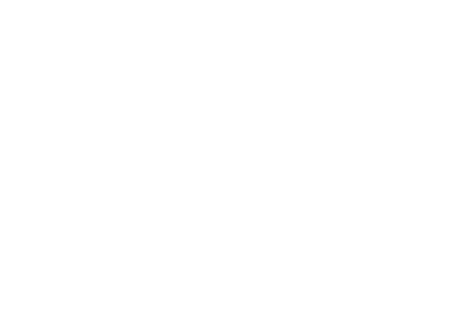

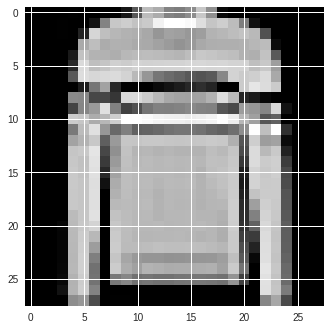

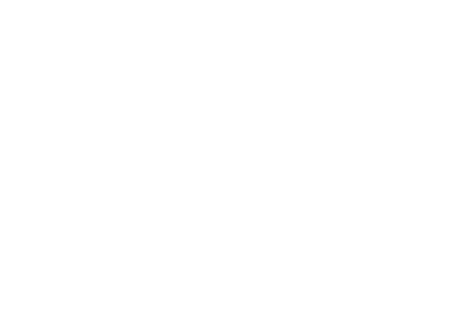

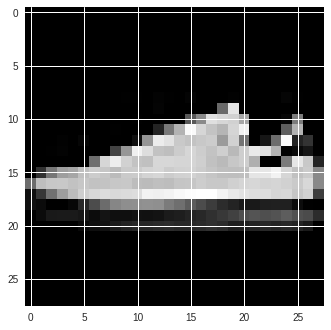

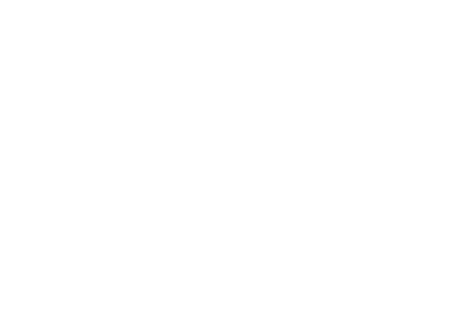

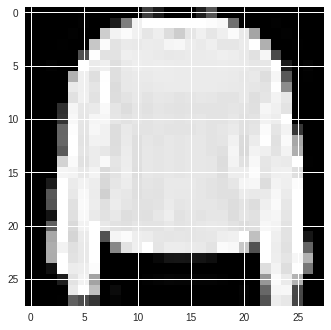

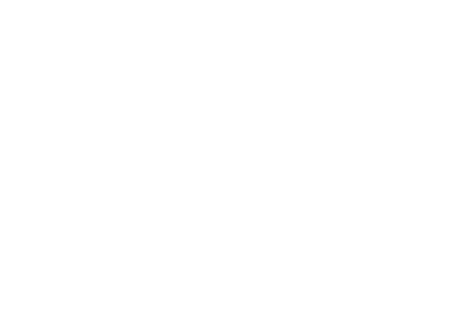

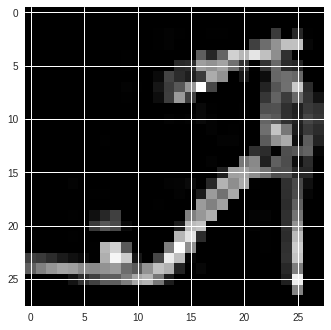

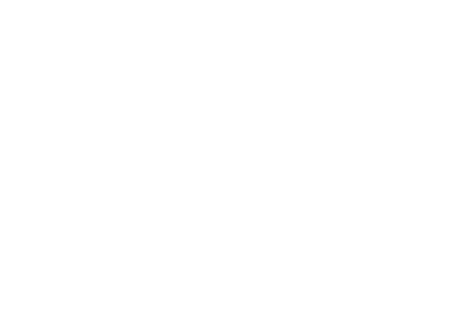

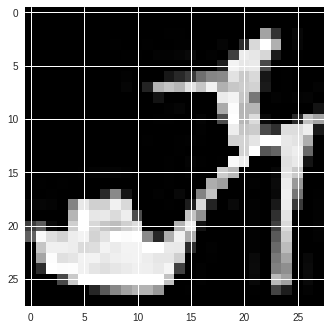

In [ ]:
for i in range(10):
  plt.style.use("seaborn")
  plt.axis("off")
  plt.figure(i)
  plt.imshow(X_train[i].reshape(28,28),cmap="gray")
  plt.show()

## CNN Model

In [ ]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation="relu"))
model.add(Convolution2D(8,(5,5),activation="relu",))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
188/188 [==============================] - 162s 859ms/step - loss: 0.7856 - accuracy: 0.7146 - val_loss: 0.5379 - val_accuracy: 0.8083
Epoch 2/20
188/188 [==============================] - 161s 859ms/step - loss: 0.4519 - accuracy: 0.8407 - val_loss: 0.4176 - val_accuracy: 0.8587
Epoch 3/20
188/188 [==============================] - 161s 856ms/step - loss: 0.3798 - accuracy: 0.8669 - val_loss: 0.3857 - val_accuracy: 0.8690
Epoch 4/20
188/188 [==============================] - 161s 854ms/step - loss: 0.3395 - accuracy: 0.8799 - val_loss: 0.3521 - val_accuracy: 0.8791
Epoch 5/20
188/188 [==============================] - 160s 852ms/step - loss: 0.3140 - accuracy: 0.8877 - val_loss: 0.3276 - val_accuracy: 0.8893
Epoch 6/20
188/188 [==============================] - 160s 853ms/step - loss: 0.2997 - accuracy: 0.8936 - val_loss: 0.3254 - val_accuracy: 0.8889
Epoch 7/20
188/188 [==============================] - 160s 853ms/step - loss: 0.2834 - accuracy: 0.8992 - val_loss: 0.3211 -

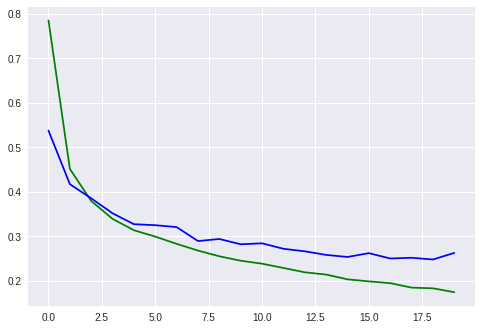

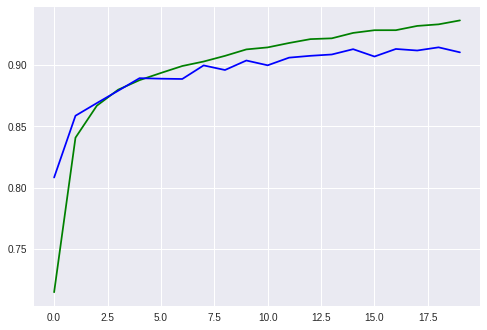

In [ ]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()
plt.plot(hist.history['accuracy'],'g')
plt.plot(hist.history['val_accuracy'],'b')
plt.show()

## CNN on MNIST Data

In [1]:
from keras.layers import *
from keras.models import Sequential

In [8]:
## Build a  Model

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [11]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [14]:
def preprocess_data(X,Y):
    X =X.reshape((-1,28,28,1))
    X = X/255
    Y = to_categorical(Y,10)
    return X,Y

In [16]:
X_train,Y_train = preprocess_data(X_train,Y_train)

In [18]:
X_train.shape,Y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [19]:
X_test,Y_test = preprocess_data(X_test,Y_test)
X_test.shape,Y_test.shape

((10000, 28, 28, 1), (10000, 10))

In [21]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
model.fit(X_train,Y_train,epochs = 5,validation_split=0.3,batch_size=200)

Epoch 1/5
210/210 [==============================] - 33s 159ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0066 - val_accuracy: 0.9982
Epoch 2/5
210/210 [==============================] - 33s 159ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 3/5
210/210 [==============================] - 33s 159ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0067 - val_accuracy: 0.9982
Epoch 4/5
210/210 [==============================] - 33s 160ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0072 - val_accuracy: 0.9982
Epoch 5/5
210/210 [==============================] - 33s 159ms/step - loss: 9.0627e-04 - accuracy: 0.9998 - val_loss: 0.0071 - val_accuracy: 0.9981


In [24]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0241 - accuracy: 0.9941


[0.024078482761979103, 0.9940999746322632]

# Data Augmentation

In [53]:
img_path = "./horse-3.jpg"

In [54]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [55]:
img = image.load_img(img_path,target_size=(200,200))

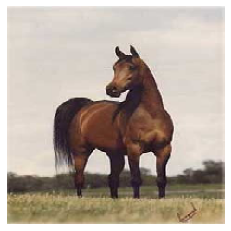

In [56]:
plt.imshow(img)
plt.axis("off")
plt.show()

In [58]:
x = image.img_to_array(img)
x /= 255

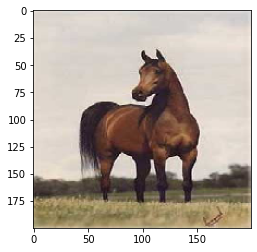

In [59]:
plt.imshow(x)
plt.show()

In [62]:
x = x.reshape((1,200,200,3))

In [64]:
datagen = image.ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.0,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

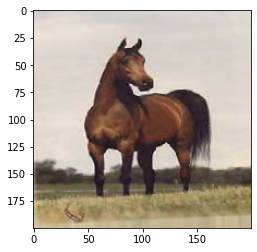

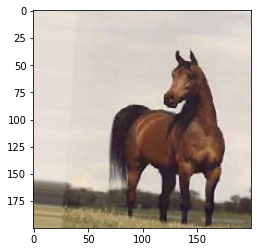

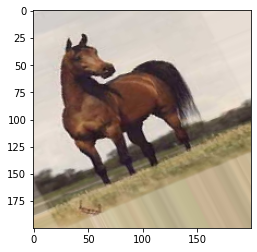

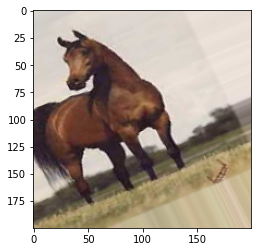

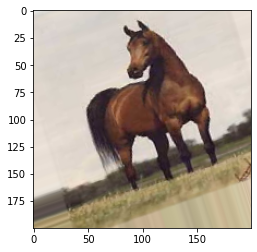

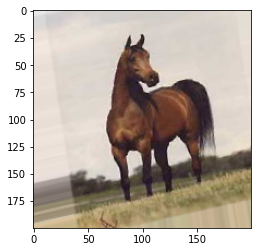

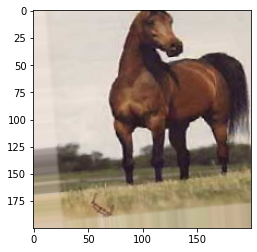

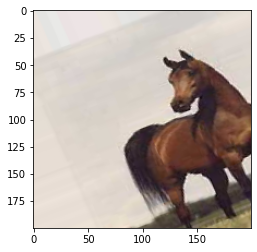

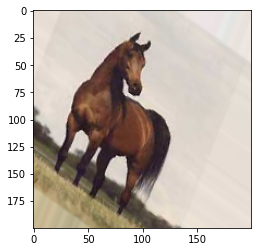

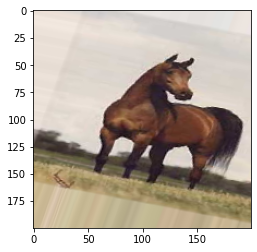

In [68]:
count = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure()
    imgplot = plt.imshow(image.img_to_array(batch[0]))
    count += 1
    plt.show()
    if count == 10 :
        break